In [41]:
def vectorfield(w, t, p):
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p
    
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) - k2 * ( x1 - L1 + L2 - x2 )) / m1,
         y2,
         (-b2 * y2 - k3 * ( x2 - L2 ) - k2 * ( x2 - L2 + L1 - x1 ))/ m2]  
    return f

In [42]:
from scipy.integrate import odeint
#Masas
m1 = 1.0
m2 = 1.0
#Constantes del resorte
k1 = 1.0
k2 = 2.0
k3 = 3.0
#Coeficientes de fricción
b1 = 0.5
b2 = 0.1
#Longitud natural
L1 = 1.0
L2 = 0.9

#Condiciones iniciales
x1 = 1.0
y1 = 1.0
x2 = 0.0
y2 = 0.0

#Parámetros de resolución de EDO (Ecuación Diferencial Ordinaria)
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 30.0
numpoints = 750

#Ancho de paso
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

#Llamamos al solucionador de EDO
wsol = odeint(vectorfield, w0, t, args=(p,), atol=abserr, rtol=relerr)

for t1, w1 in zip(t, wsol):
    print (t1, w1[0], w1[1], w1[2], w1[3],file =open('dos_resortes ','a'))

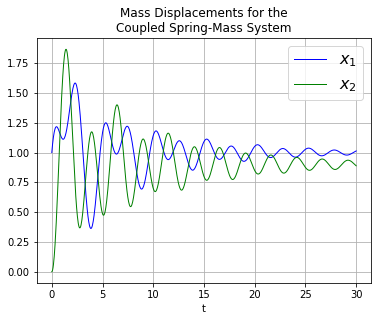

In [43]:
# Plot the solution that was generated

from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

t, x1, xy, x2, y2 = loadtxt('dos_resortes', unpack=True)

plt.figure(figsize=(6, 4.5))

plt.xlabel('t')
plt.grid()
#hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
plt.title('Mass Displacements for the\nCoupled Spring-Mass System')
plt.savefig('two_springs.png', dpi=100)